# Analysis notebook: `SU2020_CRY_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020_CRY_onspill-LH_aw"

## Preamble

In [2]:
from preamble import *

## Load data

In [3]:
!ls ../../output/results/SU2020_CRY_onspill-LH_aw

cut_flow.csv	events.parquet	info.txt     SU2020_CRY_onspill-LH_aw.log
efficiency.csv	hists.h5	results.pkl  SU2020_CRY_onspill-LH_aw.yaml


In [4]:
loader = Load(
    in_path = f"../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../output/results/SU2020_CRY_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../output/results/SU2020_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../output/results/SU2020_CRY_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../output/results/SU2020_CRY_onspill-LH_aw/hists.h5
[Load] ✅ Loaded efficiency info from ../../output/results/SU2020_CRY_onspill-LH_aw/efficiency.csv
[Load] ✅ Successfully loaded ak.Array from ../../output/results/SU2020_CRY_onspill-LH_aw/events.parquet
[Load] ✅ Loaded info from ../../output/results/SU2020_CRY_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,2529740,100.000000,100.000000,No selection applied
1,is_reco_electron,2442213,96.540079,96.540079,Electron track fits
2,has_trk_front,2399747,94.861409,98.261167,Tracks intersect tracker entrance
3,good_trkqual,377984,14.941615,15.750994,Track fit quality > 0.8
4,within_t0,307816,12.167891,81.436251,t0 at tracker entrance (640 < t_0 < 1650 ns)
5,is_downstream,221797,8.767581,72.055059,Downstream tracks (p_z > 0 at tracker entrance)
6,has_hits,221088,8.739554,99.680338,>20 active tracker hits
7,within_t0err,180170,7.122076,81.492437,Track fit t0 uncertainty (t0err < 0.9 ns)
8,within_d0,36395,1.438685,20.200366,Distance of closest approach (d_0 < 100 mm)
9,within_pitch_angle,13299,0.525706,36.540734,Extrapolated pitch angle (0.5 < tan(theta_Dip)...


### Histograms

In [7]:
draw = Draw()

# Define image directory
img_dir = f"../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../output/images/SU2020_CRY_onspill-LH_aw/h1o_1x3_mom_windows.png


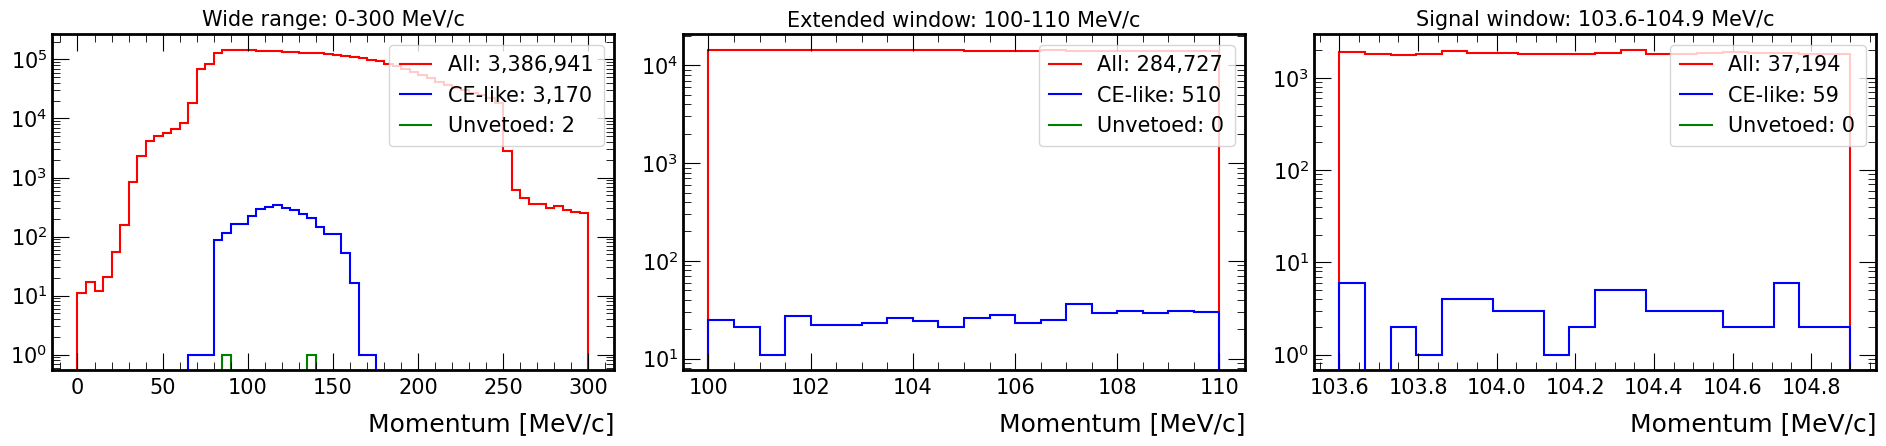

In [8]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../output/images/SU2020_CRY_onspill-LH_aw/h1o_crv_zwindows.png


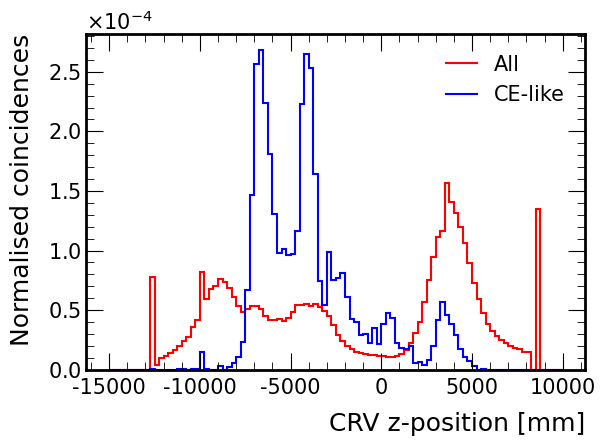

In [9]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_zwindows.png") 

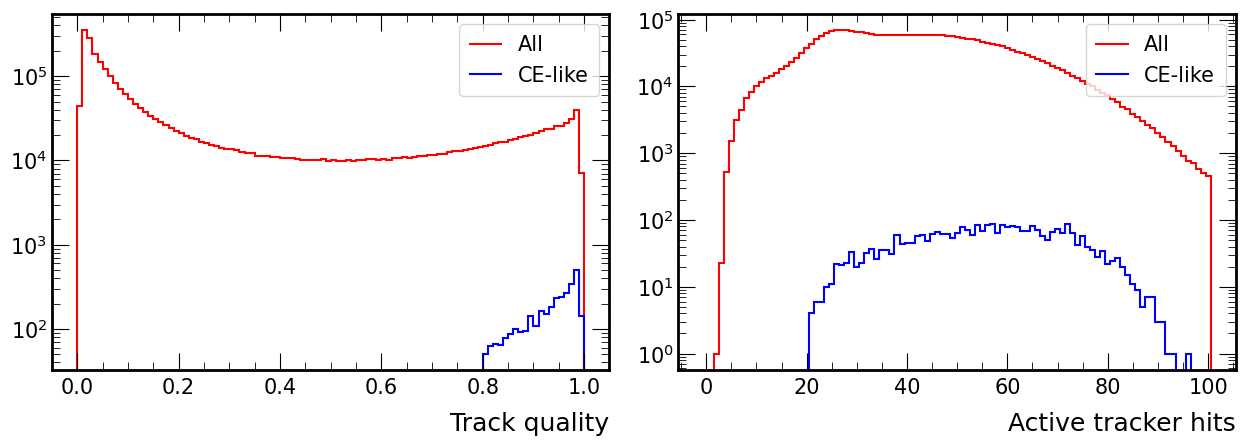

In [10]:
draw.plot_trk_params(results["hists"])

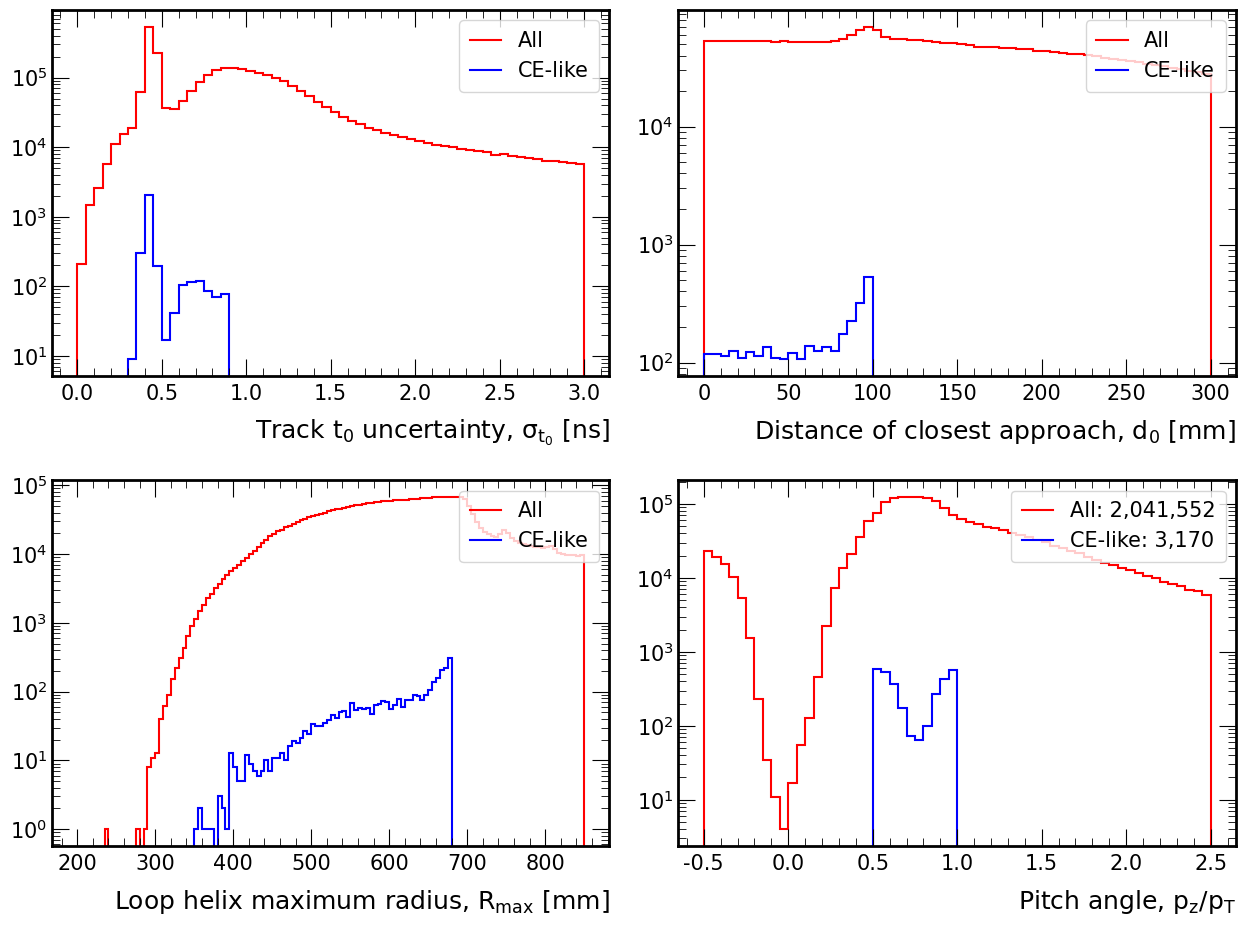

In [11]:
# draw.plot_trkfit_params(results["hists"])
draw.plot_trkfit_params_SU2020(results["hists"])

### Efficiency 

In [12]:
display(results["efficiency"])

,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error [%]
0,Signal (wide),3170,4000000,0.08,0.00
1,Signal (ext),510,4000000,0.01,0.00
2,Signal (sig),59,4000000,0.00,0.00
3,Veto (wide),2,3170,99.94,0.05
4,Veto (ext),0,510,100.00,0.10
5,Veto (sig),0,59,100.00,0.83


### Background event info

In [13]:
print(results["event_info"])

  Index:            20
  Subrun:           [3113]
  Event:            [86303]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_best_v1_3_v06_05_00.001202_00000034.root
  Track time [ns]:  1004.101804
  Coinc time [ns]:  853.986267
  dt [ns]:          150.115536
----------------------------------------
  Index:            200
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020aw_best_v1_3_v06_05_00.001202_00015581.root
  Track time [ns]:  822.773672
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------


In [14]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 2 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 3113
evt.event: 86303
crv.crvcoincs.time: [854]
crv.crvcoincs.nHits: [18]
crv.crvcoincs.pos.fCoordinates.fZ: [2.56e+03]
is_reco_electron: [True, False]
at_trk_front: [[False, False, False, True, False, False], [False, False, ..., False]]
has_trk_front: [True, True]
good_trkqual: [True, False]
within_t0: [True, True]
is_downstream: [True, True]
has_hits: [True, True]
within_t0err: [True, True]
within_d0: [True, True]
within_pitch_angle: [True, True]
within_lhr_max: [True, True]
within_lhr_max_hi: [True, True]
is_truth_electron: [True, True]
one_reco_electron: [True, True]
one_reco_electron_per_event: True
unvetoed: [True, False]
within_ext_win: [False, False]
within_sig_win: [False, False]
CE_like: [True, False]
unvetoed_CE_like: [True, False]
trk.trk.nactive: [59]
trk.tr